In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from numpy import array 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.plotting import scatter_matrix

## L’exploration des données du Data set en utilisant pandas.

In [2]:
#  load data from CSV
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")

In [3]:
print(train.shape)

(12873, 190)


In [4]:
print(test.shape)

(8848, 189)


In [5]:
print(train.info)

<bound method DataFrame.info of              id target     home_team_name         away_team_name  \
0      11906497   away  Newell's Old Boys            River Plate   
1      11984383   home        Real Estelí  Deportivo Las Sabanas   
2      11983301   draw              UPNFM               Marathón   
3      11983471   away               León                Morelia   
4      11883005   home     Cobán Imperial                 Iztapa   
...         ...    ...                ...                    ...   
12868  11908577   away         Concarneau               Boulogne   
12869  11908573   home       Bastia-Borgo        Gazélec Ajaccio   
12870  11871407   draw           Le Havre                   Lens   
12871  11908575   draw              Laval           Lyon Duchère   
12872  11872123   home     MVV Maastricht               Jong PSV   

            match_date       league_name  league_id  is_cup  \
0       12/1/2019 0:45         Superliga        636   False   
1       12/1/2019 1:00  P

## Le résumer statistique du Data Set 

In [6]:
train.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.287300e+04,12873.000000,1.275500e+04,1.275500e+04,12706.000000,12528.000000,12340.000000,12178.000000,12012.000000,11853.000000,...,12688.000000,12477.000000,12278.000000,12086.000000,11915.000000,11717.000000,11539.000000,11318.000000,11100.000000,10865.000000
mean,1.194160e+07,893.847588,1.770749e+07,1.785615e+07,0.324335,0.547573,0.485413,0.505584,0.492674,0.507382,...,865.892891,844.585397,825.813569,809.466490,800.629794,791.737305,787.397608,775.203923,771.364865,761.671422
std,5.024559e+04,524.059033,1.710250e+07,1.708244e+07,0.468144,0.497751,0.499807,0.499989,0.499967,0.499967,...,528.147486,528.962305,527.529287,525.603769,523.573614,521.812387,523.367859,522.043173,523.061717,522.089390
min,1.142829e+07,2.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.190892e+07,432.000000,4.715320e+05,4.732085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,384.000000,372.000000,343.000000,328.000000,328.000000,325.000000,313.000000,304.000000,304.000000,301.000000
50%,1.194627e+07,1025.000000,1.030971e+07,1.171194e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,947.000000,902.000000,875.000000,854.000000,830.000000,827.000000,818.000000,806.000000,770.000000,743.000000
75%,1.198289e+07,1271.000000,3.725251e+07,3.725251e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1269.000000,1265.000000,1263.000000,1261.000000,1258.000000,1255.000000,1255.000000,1254.000000,1253.000000,1252.000000
max,1.201625e+07,1786.000000,3.741043e+07,3.741056e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1784.000000,1784.000000,1777.000000,1777.000000,1777.000000,1773.000000,1766.000000,1759.000000,1759.000000,1759.000000


## L'affichage des nuages des points 

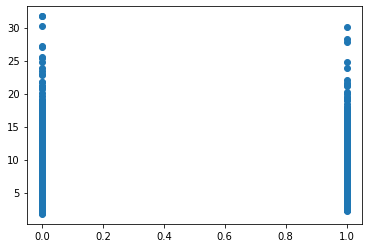

In [98]:
plt.scatter(train.home_team_history_is_play_home_1,train.away_team_history_opponent_rating_1)

In [9]:
train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,12/1/2019 0:45,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,12/1/2019 1:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,12/1/2019 1:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,12/1/2019 1:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,12/1/2019 1:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,11908577,away,Concarneau,Boulogne,1/31/2020 19:00,National,313,False,28932745.0,1552334.0,...,313.0,313.0,313.0,313.0,313.0,313.0,307.0,313.0,313.0,313.0
12869,11908573,home,Bastia-Borgo,Gazélec Ajaccio,1/31/2020 19:00,National,313,False,1553075.0,896573.0,...,313.0,313.0,313.0,313.0,313.0,307.0,313.0,313.0,313.0,313.0
12870,11871407,draw,Le Havre,Lens,1/31/2020 19:00,Ligue 2,304,False,2823347.0,896551.0,...,304.0,304.0,304.0,304.0,307.0,304.0,304.0,304.0,307.0,304.0
12871,11908575,draw,Laval,Lyon Duchère,1/31/2020 19:00,National,313,False,456483.0,37260046.0,...,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0


In [10]:
#Cenvert string value to boolean
is_cup = ["True", "False", "True", "True", "False"] 
  
print("The original list : " + str(is_cup)) 
  
res = list(map(lambda ele: ele == "True", is_cup)) 
  
print("The converted Boolean values : " + str(res))

The original list : ['True', 'False', 'True', 'True', 'False']
The converted Boolean values : [True, False, True, True, False]


In [11]:
#keep only some features
new_data_train = train.drop(['home_team_name', 'away_team_name'], axis=1) #, inplace=True) # is_cup EXCLUDED
# Exclude all date, league, coach columns
new_data_train.drop(train.filter(regex='date').columns, axis=1, inplace = True)
new_data_train.drop(train.filter(regex='league').columns, axis=1, inplace = True)
new_data_train.drop(train.filter(regex='coach').columns, axis=1, inplace = True)

In [12]:
new_data_train

,id,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,...,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10
0,11906497,away,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.253225,2.819962,3.114820,3.283603,2.574183,5.887331,4.570225,2.843268,3.057739,4.684664
1,11984383,home,False,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,6.881762,6.840558,8.700363,5.156150,3.864878,6.237028,6.871904,5.716200,7.960465,9.994456
2,11983301,draw,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.487337,7.697712,4.186315,5.183071,6.176583,4.054209,4.650054,5.284983,5.299259,3.862791
3,11983471,away,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.998800,6.548433,4.576617,8.342183,4.878850,6.208425,7.483589,5.587388,7.301455,7.766762
4,11883005,home,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.575180,5.901842,5.751275,4.163600,8.559950,4.059211,8.935007,5.888077,4.413683,7.031962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,11908577,away,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,4.305275,5.421500,4.991617,6.864350,4.561317,4.266373,7.372010,4.177341,4.769371,3.725611
12869,11908573,home,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,3.678342,4.524245,6.142694,5.968797,4.164942,4.697400,5.334936,5.510450,5.853711,4.247770
12870,11871407,draw,False,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3.650136,5.032269,2.802264,4.537529,3.968821,3.374376,4.006581,3.173963,3.828390,3.920891
12871,11908575,draw,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,4.867088,5.825165,4.776544,4.928560,4.054137,5.069400,3.970109,4.940986,5.114317,4.181472


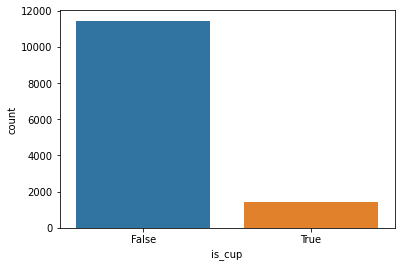

In [13]:
sns.countplot(x='is_cup', data=train)

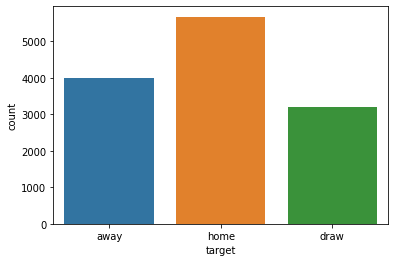

In [14]:
sns.countplot(x='target', data=train)

In [15]:
#keep only some features
new_data_test = test.drop(['home_team_name', 'away_team_name'], axis=1) #, inplace=True) # is_cup EXCLUDED
# Exclude all date, league, coach columns
new_data_test.drop(test.filter(regex='date').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='league').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='coach').columns, axis=1, inplace = True)

In [16]:
new_data_train.isnull().any()

id                                      False
target                                  False
is_cup                                  False
home_team_history_is_play_home_1         True
home_team_history_is_play_home_2         True
                                        ...  
away_team_history_opponent_rating_6      True
away_team_history_opponent_rating_7      True
away_team_history_opponent_rating_8      True
away_team_history_opponent_rating_9      True
away_team_history_opponent_rating_10     True
Length: 123, dtype: bool

In [17]:
new_data_test.isnull().any()

id                                      False
is_cup                                  False
home_team_history_is_play_home_1         True
home_team_history_is_play_home_2         True
home_team_history_is_play_home_3         True
                                        ...  
away_team_history_opponent_rating_6      True
away_team_history_opponent_rating_7      True
away_team_history_opponent_rating_8      True
away_team_history_opponent_rating_9      True
away_team_history_opponent_rating_10     True
Length: 122, dtype: bool

In [18]:
new_data_test.columns[new_data_test.isnull().any()]

Index(['home_team_history_is_play_home_1', 'home_team_history_is_play_home_2',
       'home_team_history_is_play_home_3', 'home_team_history_is_play_home_4',
       'home_team_history_is_play_home_5', 'home_team_history_is_play_home_6',
       'home_team_history_is_play_home_7', 'home_team_history_is_play_home_8',
       'home_team_history_is_play_home_9', 'home_team_history_is_play_home_10',
       ...
       'away_team_history_opponent_rating_1',
       'away_team_history_opponent_rating_2',
       'away_team_history_opponent_rating_3',
       'away_team_history_opponent_rating_4',
       'away_team_history_opponent_rating_5',
       'away_team_history_opponent_rating_6',
       'away_team_history_opponent_rating_7',
       'away_team_history_opponent_rating_8',
       'away_team_history_opponent_rating_9',
       'away_team_history_opponent_rating_10'],
      dtype='object', length=120)

In [19]:
new_data_test

,id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10
0,17761448,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,4.721590,6.953965,6.535228,5.782611,7.538950,8.428800,4.922229,6.796484,3.809293,6.721784
1,17695487,False,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4.459100,4.543053,4.861583,5.082300,9.011000,6.621075,4.141575,5.056690,6.625557,5.895073
2,17715496,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,7.091122,5.880817,7.727192,3.754163,6.756878,7.167800,8.135642,NaN,4.635817,5.381225
3,17715493,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.790810,3.562960,4.655450,4.232500,3.999711,4.095675,3.746925,4.952475,4.894475,6.120000
4,17715492,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,6.000775,7.648230,5.580242,6.971550,5.624680,5.733725,4.453211,8.787767,8.194879,7.362907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,18085099,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.007680,6.455658,5.608300,7.383336,5.945269,7.173248,5.652190,9.085503,4.960186,7.295618
8844,18085097,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3.590624,4.850037,3.259702,3.934419,4.387054,2.725050,3.729041,3.367843,5.019950,2.988996
8845,17242709,False,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3.210950,3.148440,3.291400,11.684252,5.804956,5.080637,6.965300,5.994717,8.599784,3.510467
8846,18085095,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.820614,4.396505,7.544776,8.538368,4.629244,3.061412,3.470452,4.884133,3.094850,4.570055


In [20]:
new_data_train.isnull().sum()

id                                         0
target                                     0
is_cup                                     0
home_team_history_is_play_home_1         167
home_team_history_is_play_home_2         345
                                        ... 
away_team_history_opponent_rating_6     1156
away_team_history_opponent_rating_7     1334
away_team_history_opponent_rating_8     1555
away_team_history_opponent_rating_9     1773
away_team_history_opponent_rating_10    2008
Length: 123, dtype: int64

In [21]:
new_data_test.isnull().sum()

id                                        0
is_cup                                    0
home_team_history_is_play_home_1         26
home_team_history_is_play_home_2         65
home_team_history_is_play_home_3        105
                                       ... 
away_team_history_opponent_rating_6     325
away_team_history_opponent_rating_7     404
away_team_history_opponent_rating_8     489
away_team_history_opponent_rating_9     566
away_team_history_opponent_rating_10    632
Length: 122, dtype: int64

In [22]:
new_data_train = new_data_train.fillna(new_data_train.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### features selection SelectKBest




In [23]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 50)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
y= new_data_train['target']
X = new_data_train.iloc[:,50:]
X.shape

X_new = SelectKBest(chi2, k=50).fit_transform(X, y)
X_new.shape
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                              Feat_names    F_Scores
30            away_team_history_rating_1  113.379568
4    home_team_history_opponent_rating_2  105.750253
33            away_team_history_rating_4  101.861596
3    home_team_history_opponent_rating_1   95.400907
34            away_team_history_rating_5   94.495748
31            away_team_history_rating_2   92.358576
32            away_team_history_rating_3   92.017635
35            away_team_history_rating_6   90.749307
5    home_team_history_opponent_rating_3   85.292339
36            away_team_history_rating_7   78.371218
38            away_team_history_rating_9   76.462993
37            away_team_history_rating_8   76.108854
39           away_team_history_rating_10   76.076673
6    home_team_history_opponent_rating_4   75.857275
7    home_team_history_opponent_rating_5   74.731091
40   away_team_history_opponent_rating_1   67.406640
8    home_team_history_opponent_rating_6   59.046754
10   home_team_history_opponent_rating_8   55.

In [24]:
new_data_test = new_data_test.fillna(new_data_test.mean())

## PCA (Pour réduire les dimensions de la base de données)

In [25]:
features = ['home_team_history_is_play_home_1', 'home_team_history_is_play_home_2','home_team_history_is_play_home_3','home_team_history_is_play_home_4','home_team_history_is_play_home_5','home_team_history_is_play_home_6','home_team_history_is_play_home_7','home_team_history_is_play_home_8','home_team_history_is_play_home_9','home_team_history_is_play_home_10',]

In [26]:
x = new_data_train.loc[:, features].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data= principalComponents, columns = ['HTHPH'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-3.0710157 ]
 [ 0.14990596]
 [-3.0710157 ]
 ...
 [ 1.37006967]
 [-3.0710157 ]
 [-2.61273284]]


In [27]:
x = new_data_test.loc[:, features].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data= principalComponents, columns = ['HTHPH'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 0.33402883]
 [ 0.14076218]
 [-0.43273078]
 ...
 [-1.00947499]
 [ 2.99644567]
 [ 0.41834346]]


In [28]:
new_data_train['X_HTHPH'] = newDataframe1.HTHPH

In [29]:
new_data_test['X_HTHPH'] = newDataframe2.HTHPH

In [30]:
features1 = ['away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10']

In [31]:
x = new_data_train.loc[:, features1].values
y = new_data_train.loc[:, ['target']].values
# x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHOR'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-7.79747155e+00]
 [ 1.47473396e+00]
 [-3.18888714e+00]
 ...
 [-7.63545486e+00]
 [-4.62913336e+00]
 [-6.92531296e-15]]


In [32]:
x = new_data_test.loc[:, features1].values
y = new_data_test.loc[:, ['id']].values
# x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHOR'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-4.29378034e-01]
 [-2.35977961e+00]
 [-1.74624230e-01]
 ...
 [-1.98648638e+00]
 [-4.83682325e+00]
 [-1.63584528e-16]]


In [33]:
new_data_train['X_ATHOR'] = newDataframe1.ATHOR

In [34]:
new_data_test['X_ATHOR'] = newDataframe2.ATHOR

In [35]:
features2 = ['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']

In [36]:
x = new_data_train.loc[:, features2].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHR'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 2.90047578e+00]
 [-1.50970702e+00]
 [ 1.60926690e+00]
 ...
 [ 8.04171303e-01]
 [-1.22593375e+00]
 [-9.51955492e-15]]


In [37]:
x = new_data_test.loc[:, features2].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHR'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-1.96884058]
 [-0.68244732]
 [-1.9431878 ]
 ...
 [-1.60972722]
 [-0.53751533]
 [ 0.74574667]]


In [38]:
new_data_train['X_ATHR'] = newDataframe1.ATHR

In [39]:
new_data_test['X_ATHR'] = newDataframe2.ATHR

In [40]:
features3 = ['away_team_history_opponent_goal_1','away_team_history_opponent_goal_2','away_team_history_opponent_goal_3','away_team_history_opponent_goal_4','away_team_history_opponent_goal_5','away_team_history_opponent_goal_6','away_team_history_opponent_goal_7','away_team_history_opponent_goal_8','away_team_history_opponent_goal_9','away_team_history_opponent_goal_10']

In [41]:
x = new_data_train.loc[:, features3].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHOG'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-1.15326598e+00]
 [ 1.61445311e-01]
 [-6.18564720e-01]
 ...
 [-1.17023322e+00]
 [-1.55786438e-01]
 [-2.29767333e-17]]


In [42]:
x = new_data_test.loc[:, features3].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHOG'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 0.2029394 ]
 [-0.78485889]
 [ 0.34797985]
 ...
 [-0.15049552]
 [-1.53017219]
 [-2.11908727]]


In [43]:
new_data_train['X_ATHOG'] = newDataframe1.ATHOG

In [44]:
new_data_test['X_ATHOG'] = newDataframe2.ATHOG

In [45]:
features9 = ['home_team_history_opponent_goal_1','home_team_history_opponent_goal_2','home_team_history_opponent_goal_3','home_team_history_opponent_goal_4','home_team_history_opponent_goal_5','home_team_history_opponent_goal_6','home_team_history_opponent_goal_7','home_team_history_opponent_goal_8','home_team_history_opponent_goal_9','home_team_history_opponent_goal_10']

In [46]:
x = new_data_train.loc[:, features9].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHOG'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-0.87550725]
 [-0.94324754]
 [ 0.90091541]
 ...
 [-0.93631399]
 [-1.20537706]
 [ 1.09951995]]


In [47]:
x = new_data_test.loc[:, features9].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHOG'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-1.84463   ]
 [ 0.13060646]
 [ 0.19451111]
 ...
 [-1.05922874]
 [-0.81626347]
 [ 0.85653234]]


In [48]:
new_data_train['X_HTHOG'] = newDataframe1.HTHOG

In [49]:
new_data_test['X_HTHOG'] = newDataframe2.HTHOG

In [50]:
features4 = ['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']

In [51]:
x = new_data_train.loc[:, features4].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHG'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 5.22419167e-01]
 [-1.50473537e+00]
 [ 1.81882026e+00]
 ...
 [ 6.16719301e-01]
 [ 2.12321041e+00]
 [ 7.58401922e-17]]


In [52]:
x = new_data_test.loc[:, features4].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHG'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-0.72887901]
 [-0.81806713]
 [-1.83260286]
 ...
 [-2.53730524]
 [ 1.01350191]
 [ 1.85797551]]


In [53]:
new_data_train['X_ATHG'] = newDataframe1.ATHG

In [54]:
new_data_test['X_ATHG'] = newDataframe2.ATHG

In [55]:
features5 = ['home_team_history_is_cup_1','home_team_history_is_cup_2','home_team_history_is_cup_3','home_team_history_is_cup_4','home_team_history_is_cup_5','home_team_history_is_cup_6','home_team_history_is_cup_7','home_team_history_is_cup_8','home_team_history_is_cup_9','home_team_history_is_cup_10']

In [56]:
x = new_data_train.loc[:, features5].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHIC'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-1.1033258 ]
 [-1.1033258 ]
 [-1.1033258 ]
 ...
 [-0.17086551]
 [-0.08659372]
 [-1.1033258 ]]


In [57]:
x = new_data_test.loc[:, features5].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHIC'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 4.26635979]
 [-0.8653217 ]
 [-0.8653217 ]
 ...
 [-0.8653217 ]
 [-0.8653217 ]
 [-0.8653217 ]]


In [58]:
new_data_train['X_HTHIC'] = newDataframe1.HTHIC

In [59]:
new_data_test['X_HTHIC'] = newDataframe2.HTHIC

In [60]:
features6 = ['away_team_history_is_cup_1','away_team_history_is_cup_2','away_team_history_is_cup_3','away_team_history_is_cup_4','away_team_history_is_cup_5','away_team_history_is_cup_6','away_team_history_is_cup_7','away_team_history_is_cup_8','away_team_history_is_cup_9','away_team_history_is_cup_10']

In [61]:
x = new_data_train.loc[:, features6].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHIC'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[ 4.11772797e+00]
 [-1.11787167e+00]
 [-1.11787167e+00]
 ...
 [ 8.80612396e-01]
 [-1.11787167e+00]
 [-1.17885625e-17]]


In [62]:
x = new_data_test.loc[:, features6].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHIC'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-0.87648311]
 [-0.87648311]
 [-0.87648311]
 ...
 [ 6.72282789]
 [-0.87648311]
 [ 4.09206785]]


In [63]:
new_data_train['X_ATHIC'] = newDataframe1.ATHIC

In [64]:
new_data_test['X_ATHIC'] = newDataframe2.ATHIC

In [65]:
features7 = ['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']

In [66]:
x = new_data_train.loc[:, features7].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHG'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-0.21684661]
 [-1.25493542]
 [ 1.26459433]
 ...
 [ 0.05390479]
 [-1.24007153]
 [ 0.48139932]]


In [67]:
x = new_data_test.loc[:, features7].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['HTHG'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-0.9611431 ]
 [-1.61642107]
 [-1.36844073]
 ...
 [-1.88526408]
 [-1.31341706]
 [-0.50111526]]


In [68]:
new_data_train['X_HTHG'] = newDataframe1.HTHG

In [69]:
new_data_test['X_HTHG'] = newDataframe2.HTHG

In [70]:
features8 = ['away_team_history_is_play_home_1', 'away_team_history_is_play_home_2','away_team_history_is_play_home_3','away_team_history_is_play_home_4','away_team_history_is_play_home_5','away_team_history_is_play_home_6','away_team_history_is_play_home_7','away_team_history_is_play_home_8','away_team_history_is_play_home_9','away_team_history_is_play_home_10',]

In [71]:
x = new_data_train.loc[:, features8].values
y = new_data_train.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHIPH'])
targetDataframe = new_data_train[['target']]
newDataframe1 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-3.35437808e-01]
 [ 1.75904871e+00]
 [ 7.17701110e-01]
 ...
 [ 2.03508178e-01]
 [-1.96336652e+00]
 [ 4.42026811e-18]]


In [72]:
x = new_data_test.loc[:, features8].values
y = new_data_test.loc[:, ['id']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['ATHIPH'])
targetDataframe = new_data_test[['id']]
newDataframe2 = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(principalComponents)

[[-1.33664041]
 [ 0.24500404]
 [ 2.07353103]
 ...
 [ 0.23279005]
 [-0.88785515]
 [-1.28679331]]


In [73]:
new_data_train['X_ATHIPH'] = newDataframe1.ATHIPH

In [74]:
new_data_test['X_ATHIPH'] = newDataframe2.ATHIPH

In [75]:
new_data_train.drop(train.filter(regex='away_team_history_goal_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_goal_').columns, axis=1, inplace = True)

In [76]:
new_data_train.drop(train.filter(regex='home_team_history_goal_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_goal_').columns, axis=1, inplace = True)

In [77]:
new_data_train.drop(train.filter(regex='home_team_history_is_cup_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_is_cup_').columns, axis=1, inplace = True)

In [78]:
new_data_train.drop(train.filter(regex='away_team_history_is_cup_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_is_cup_').columns, axis=1, inplace = True)

In [79]:
new_data_train.drop(train.filter(regex='away_team_history_opponent_goal_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_opponent_goal_').columns, axis=1, inplace = True)

In [80]:
new_data_train.drop(train.filter(regex='home_team_history_opponent_goal_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_opponent_goal_').columns, axis=1, inplace = True)

In [81]:
new_data_train.drop(train.filter(regex='home_team_history_is_play_home_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_is_play_home_').columns, axis=1, inplace = True)

In [82]:
new_data_train.drop(train.filter(regex='away_team_history_is_play_home_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_is_play_home_').columns, axis=1, inplace = True)

In [83]:
new_data_train.drop(train.filter(regex='away_team_history_opponent_rating_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_opponent_rating_').columns, axis=1, inplace = True)

In [84]:
new_data_train.drop(train.filter(regex='home_team_history_opponent_rating_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_opponent_rating_').columns, axis=1, inplace = True)

In [85]:
new_data_train.drop(train.filter(regex='home_team_history_rating_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='home_team_history_rating_').columns, axis=1, inplace = True)

In [86]:
new_data_train.drop(train.filter(regex='away_team_history_rating_').columns, axis=1, inplace = True)
new_data_test.drop(test.filter(regex='away_team_history_rating_').columns, axis=1, inplace = True)

In [87]:
print(new_data_train.info)

<bound method DataFrame.info of              id target  is_cup   X_HTHPH       X_ATHOR        X_ATHR  \
0      11906497   away   False -3.071016 -7.797472e+00  2.900476e+00   
1      11984383   home   False  0.149906  1.474734e+00 -1.509707e+00   
2      11983301   draw   False -3.071016 -3.188887e+00  1.609267e+00   
3      11983471   away   False -2.093322  3.923875e-01 -8.251346e-01   
4      11883005   home   False -3.071016 -8.953784e-01 -5.814567e-01   
...         ...    ...     ...       ...           ...           ...   
12868  11908577   away   False -3.071016 -3.778138e+00 -1.765003e+00   
12869  11908573   home   False  0.109672 -4.030090e+00 -1.670875e+00   
12870  11871407   draw   False  1.370070 -7.635455e+00  8.041713e-01   
12871  11908575   draw   False -3.071016 -4.629133e+00 -1.225934e+00   
12872  11872123   home   False -2.612733 -6.925313e-15 -9.519555e-15   

            X_ATHOG   X_HTHOG        X_ATHG   X_HTHIC       X_ATHIC    X_HTHG  \
0     -1.153266e+00 -0

In [88]:
new_data_train

,id,target,is_cup,X_HTHPH,X_ATHOR,X_ATHR,X_ATHOG,X_HTHOG,X_ATHG,X_HTHIC,X_ATHIC,X_HTHG,X_ATHIPH
0,11906497,away,False,-3.071016,-7.797472e+00,2.900476e+00,-1.153266e+00,-0.875507,5.224192e-01,-1.103326,4.117728e+00,-0.216847,-3.354378e-01
1,11984383,home,False,0.149906,1.474734e+00,-1.509707e+00,1.614453e-01,-0.943248,-1.504735e+00,-1.103326,-1.117872e+00,-1.254935,1.759049e+00
2,11983301,draw,False,-3.071016,-3.188887e+00,1.609267e+00,-6.185647e-01,0.900915,1.818820e+00,-1.103326,-1.117872e+00,1.264594,7.177011e-01
3,11983471,away,False,-2.093322,3.923875e-01,-8.251346e-01,1.661890e+00,-0.213967,2.568850e+00,-1.103326,-2.459136e-01,0.998973,6.028507e-02
4,11883005,home,False,-3.071016,-8.953784e-01,-5.814567e-01,-9.247414e-01,0.081829,9.980802e-01,-1.103326,-1.117872e+00,1.027183,9.024593e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,11908577,away,False,-3.071016,-3.778138e+00,-1.765003e+00,-1.941631e+00,-0.853228,-7.553192e-01,-1.103326,-8.576023e-02,-1.989427,1.329702e+00
12869,11908573,home,False,0.109672,-4.030090e+00,-1.670875e+00,1.544606e-01,0.695483,-3.019080e+00,2.166927,-3.934196e-02,-0.702188,6.654281e-01
12870,11871407,draw,False,1.370070,-7.635455e+00,8.041713e-01,-1.170233e+00,-0.936314,6.167193e-01,-0.170866,8.806124e-01,0.053905,2.035082e-01
12871,11908575,draw,False,-3.071016,-4.629133e+00,-1.225934e+00,-1.557864e-01,-1.205377,2.123210e+00,-0.086594,-1.117872e+00,-1.240072,-1.963367e+00


In [89]:
new_data_test

,id,is_cup,X_HTHPH,X_ATHOR,X_ATHR,X_ATHOG,X_HTHOG,X_ATHG,X_HTHIC,X_ATHIC,X_HTHG,X_ATHIPH
0,17761448,False,0.334029,-4.293780e-01,-1.968841,0.202939,-1.844630,-0.728879,4.266360,-0.876483,-0.961143,-1.336640
1,17695487,False,0.140762,-2.359780e+00,-0.682447,-0.784859,0.130606,-0.818067,-0.865322,-0.876483,-1.616421,0.245004
2,17715496,False,-0.432731,-1.746242e-01,-1.943188,0.347980,0.194511,-1.832603,-0.865322,-0.876483,-1.368441,2.073531
3,17715493,False,1.603946,-6.277407e+00,0.404952,-1.342912,0.673499,-0.631141,-0.865322,1.141346,-1.364416,-0.921544
4,17715492,False,2.110006,7.532526e-01,-2.452773,-1.080706,-0.307405,-1.870559,-0.865322,-0.876483,-1.120804,-1.974170
...,...,...,...,...,...,...,...,...,...,...,...,...
8843,18085099,False,-2.514110,-7.541283e-02,-3.147571,0.692530,-0.816501,-1.643180,-0.865322,-0.876483,0.479061,-0.703333
8844,18085097,False,-1.420926,-8.137082e+00,0.252253,-2.051740,0.171064,1.022870,-0.865322,-0.876483,-0.187430,0.232790
8845,17242709,False,-1.009475,-1.986486e+00,-1.609727,-0.150496,-1.059229,-2.537305,-0.865322,6.722828,-1.885264,0.232790
8846,18085095,False,2.996446,-4.836823e+00,-0.537515,-1.530172,-0.816263,1.013502,-0.865322,-0.876483,-1.313417,-0.887855


## Logistic Regression

In [90]:

ID = new_data_train['id']
Y = new_data_train['target']
X = new_data_train.iloc[:,2:]
test = new_data_test['id']

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [92]:
from sklearn.linear_model import LogisticRegression

#USING LOGISTICREGRESSION FOR PREDICTION
lg = LogisticRegression(random_state = 42)
lg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [93]:
y_prop_pred = lg.predict_proba(x_test)
y_prop_pred

array([[0.2356901 , 0.25966546, 0.50464444],
       [0.36467247, 0.34963879, 0.28568874],
       [0.2594892 , 0.25410677, 0.48640404],
       ...,
       [0.45766076, 0.28776294, 0.2545763 ],
       [0.31735184, 0.27092019, 0.41172798],
       [0.2535791 , 0.25665791, 0.48976299]])

In [94]:
y_pred = lg.predict(x_test)
y_pred

array(['home', 'away', 'home', ..., 'away', 'home', 'home'], dtype=object)

In [95]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy :',accuracy)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

accuracy : 0.4829104091144485
[[ 452    1  766]
 [ 222    3  726]
 [ 282    0 1410]]


In [96]:
# away, draw, home
submission = pd.DataFrame(y_prop_pred,columns=['away', 'draw', 'home'])

# Round
round_num = False
if round_num:
    submission = submission.round(2)
    submission['draw'] = 1 - (submission['home'] + submission['away'])  
    
#do not forget the id column
submission['id'] = ID
#submit!
submission[['id', 'home', 'away', 'draw']].to_csv('submission.csv', index=False)
submission[['id', 'home', 'away', 'draw']].head()

,id,home,away,draw
0,11906497,0.504644,0.235690,0.259665
1,11984383,0.285689,0.364672,0.349639
2,11983301,0.486404,0.259489,0.254107
3,11983471,0.355634,0.415561,0.228805
4,11883005,0.576687,0.163993,0.259320


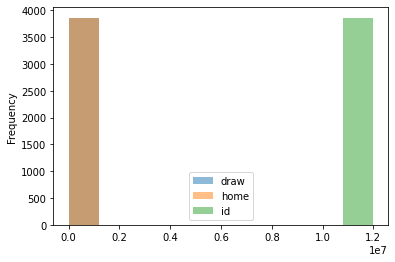

In [97]:
submission.iloc[:, 1:].plot.hist(alpha=0.5);